#Import Packages

In [0]:
import zipfile
import os
import glob
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Import Data dan Ekstrak ZIP

In [0]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


--2020-05-06 12:23:25--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.68MB/s    in 43s     

2020-05-06 12:24:09 (7.20 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/Rock Paper Scissor'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [0]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [0]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 726
total training paper images: 712
total training scissors images: 750


# Image Processing dengan ImageGenerator


In [0]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images'


train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
	                  zoom_range=0.15,
	                  width_shift_range=0.2,
	                  height_shift_range=0.2,
	                  shear_range=0.15,
	                  horizontal_flip=True,
	                  fill_mode="nearest",
                                        validation_split = 0.2
                    )
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
	                  zoom_range=0.15,
	                  width_shift_range=0.2,
	                  height_shift_range=0.2,
	                  shear_range=0.15,
	                  horizontal_flip=True,
	                  fill_mode="nearest",
                                        validation_split = 0.2
                    )

## Split Train dan Validasi 

In [0]:
train_gen = train_datagen.flow_from_directory(
                                          data_dir,
                                          target_size = (150,150),
                                          batch_size=32,
                                          class_mode = 'categorical',
                                          )

test_gen = test_datagen.flow_from_directory(
                                          data_dir,
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='categorical',
                                          shuffle=False,
                                          subset = 'validation'
                                          )


Found 2188 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
ia o
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.4),

                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=['accuracy'])

# Training

In [0]:
history = model.fit(
                    train_gen,
                    steps_per_epoch=25,  
                    epochs=15,
                    validation_data=test_gen,
                    validation_steps=test_gen.samples / test_gen.batch_size -1,  
                    verbose=1)

model.save('submissionModel.h5')

Epoch 1/15
25/25 [==============================] - 19s 769ms/step - loss: 1.1485 - accuracy: 0.3840 - val_loss: 1.1021 - val_accuracy: 0.3402
Epoch 2/15
25/25 [==============================] - 19s 760ms/step - loss: 1.1141 - accuracy: 0.3440 - val_loss: 1.0918 - val_accuracy: 0.3425
Epoch 3/15
25/25 [==============================] - 19s 760ms/step - loss: 1.1435 - accuracy: 0.3920 - val_loss: 1.0381 - val_accuracy: 0.4368
Epoch 4/15
25/25 [==============================] - 19s 758ms/step - loss: 1.0349 - accuracy: 0.5040 - val_loss: 0.7963 - val_accuracy: 0.6621
Epoch 5/15
25/25 [==============================] - 19s 761ms/step - loss: 0.6932 - accuracy: 0.7200 - val_loss: 0.6168 - val_accuracy: 0.7195
Epoch 6/15
25/25 [==============================] - 19s 755ms/step - loss: 0.7059 - accuracy: 0.7440 - val_loss: 0.5651 - val_accuracy: 0.7931
Epoch 7/15
25/25 [==============================] - 19s 762ms/step - loss: 0.6706 - accuracy: 0.7360 - val_loss: 0.5314 - val_accuracy: 0.8046

# Evaluasi Model

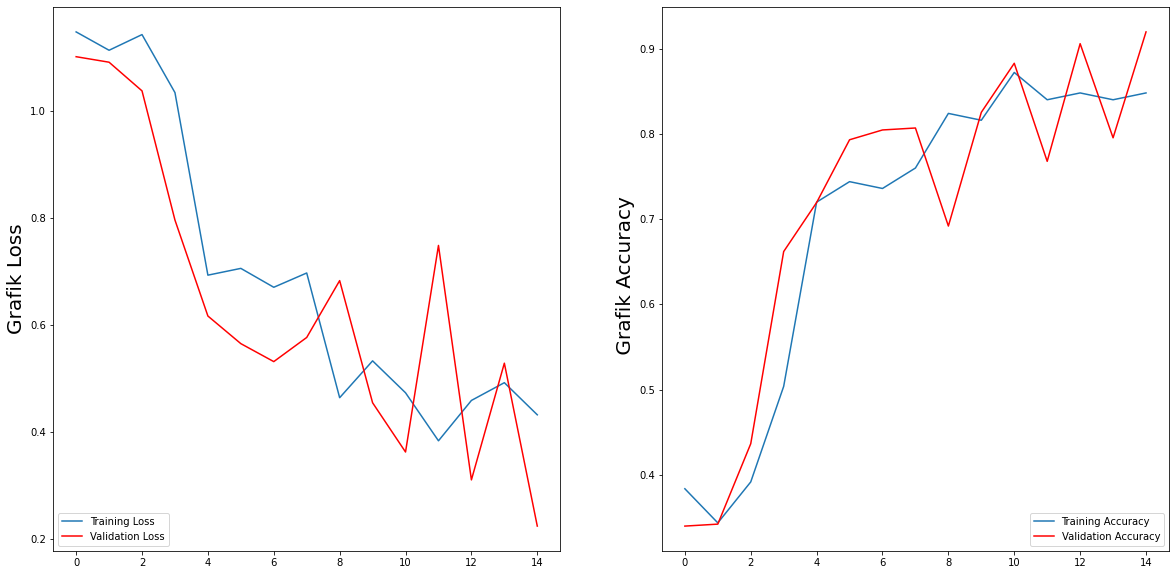

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Grafik Loss', fontsize=20)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r')
plt.legend(loc='lower left')

plt.subplot(1, 2, 2)
plt.ylabel(' Grafik Accuracy', fontsize=20)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color='r')
plt.legend(loc='lower right')
plt.show()

# Prediksi Model

## Pengidentifikasi Label Kertas, Gunting dan Batu

#### Kertas = [[1. 0. 0.]]
#### Gunting = [[0. 0. 1.]]
#### Batu = [[0. 1. 0.]]

Saving ZzIlyDP6opy9ifkB - Copy - Copy.png to ZzIlyDP6opy9ifkB - Copy - Copy (13).png
ZzIlyDP6opy9ifkB - Copy - Copy.png [[0. 0. 1.]]


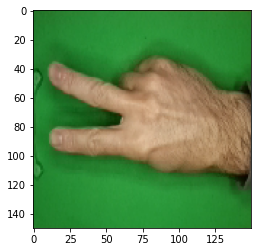

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)

Saving buatu.jpg to buatu.jpg
[[0. 1. 0.]]


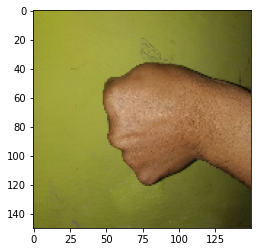

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)


  

Saving paper3.jpg to paper3.jpg
[[1. 0. 0.]]


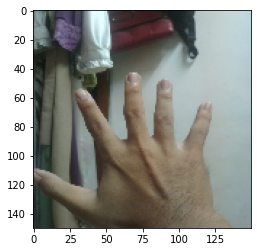

In [0]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)

Referensi 

- Dicoding Academies(https://www.dicoding.com/academies/184)
- Coursera, Convolutional Neural Networks in Tensorflow (https://www.coursera.org/learn/convolutional-neural-networks-tensorflow)
- Medium (https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd)
- Imagegenerator referensi(https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/)
- Improve model(https://datascience.stackexchange.com/questions/57171/how-to-improve-low-accuracy-keras-model-design & https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)
- JCop.ml (https://www.youtube.com/channel/UCszUEDUxCax7i5YsbAt0Tag)